# Processing of tabular data 

__Import Statements__

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Research question

> ### How does the population change over time in Germany, France and Italy?

## Read the data

The data is obtained form [Global Health Data Exchange](http://ghdx.healthdata.org/), the world’s most comprehensive catalog of surveys, censuses, vital statistics, and other health-related data. 

__Read__ `.csv` __file__

In [2]:
pop = pd.read_csv("../data/IHME_GBD_2016_POPULATION_ESTIMATES_1990_2016_Y2017M09D14.csv")

In [3]:
pop

,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,pop
0,1,Global,1,Male,1,Under 5,1990,3.073378e+08
1,1,Global,2,Female,1,Under 5,1990,2.911299e+08
2,1,Global,3,Both,1,Under 5,1990,5.984677e+08
3,1,Global,1,Male,1,Under 5,1991,3.089656e+08
4,1,Global,2,Female,1,Under 5,1991,2.921822e+08
5,1,Global,3,Both,1,Under 5,1991,6.011477e+08
6,1,Global,1,Male,1,Under 5,1992,3.096011e+08
7,1,Global,2,Female,1,Under 5,1992,2.923199e+08
8,1,Global,3,Both,1,Under 5,1992,6.019210e+08
9,1,Global,1,Male,1,Under 5,1993,3.094043e+08


## Inspect the data

__Columns__

In [4]:
pop.columns

Index(['location_id', 'location_name', 'sex_id', 'sex_name', 'age_group_id',
       'age_group_name', 'year_id', 'pop'],
      dtype='object')


## Exploratory Data Analysis

In [5]:
pop.location_name.nunique()

231

In [6]:
pop.location_name.sample(10)

472588                  Rwanda
544083                   Niger
333155               Nicaragua
574551    Virgin Islands, U.S.
354625                 Algeria
39632                 Thailand
575214    Virgin Islands, U.S.
194700                 Denmark
265382     Antigua and Barbuda
238955          United Kingdom
Name: location_name, dtype: object

In [7]:
pop.sex_name.unique()

array(['Male', 'Female', 'Both'], dtype=object)

In [8]:
pop.age_group_name.unique()

array(['Under 5', 'Early Neonatal', 'Late Neonatal', 'Post Neonatal',
       '1 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29',
       '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54',
       '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79',
       'All Ages', '5-14 years', '15-49 years', '50-69 years',
       '70+ years', '<1 year', '80 to 84', '85 to 89', '90 to 94',
       '<20 years', '10-24 years', '95 plus'], dtype=object)

## Analyzing a subset of the dataset

__Subsetting__

In [9]:
ages = ['5-14 years', '15-49 years', '50-69 years','70+ years']
location = ["Germany", "France", "Italy"]
sex = ['Male', 'Female']
cond = (
    pop.age_group_name.isin(ages) & 
    pop.location_name.isin(location) & 
    pop.sex_name.isin(sex)
)

In [10]:
pop_subset = pop.loc[cond,:]
print(pop_subset.shape)
pop_subset.sample(5)

(648, 8)


,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,pop
217129,86,Italy,2,Female,26,70+ years,2006,5041511.75
201342,80,France,1,Male,23,5-14 years,2009,3922144.29
217012,86,Italy,2,Female,25,50-69 years,1994,6986313.23
216921,86,Italy,1,Male,24,15-49 years,1991,14420229.60
201372,80,France,1,Male,24,15-49 years,1992,14533763.09


### Split-Apply-Combine

![](_img/split-apply-combine.png)
Image source: [Jake VanderPlas 2016, Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

**Question: How did the population of Germany, Italy and France change over time?**

In [11]:
gb = pop_subset.groupby(["year_id", "location_name"])["pop"].sum()
gb

year_id  location_name
1990     France           52924678.45
         Germany          74905392.07
         Italy            53965720.67
1991     France           53204997.81
         Germany          75282202.61
         Italy            54096588.22
1992     France           53491245.78
         Germany          75846260.69
         Italy            54185851.15
1993     France           53764681.77
         Germany          76382332.04
         Italy            54181997.23
1994     France           54014103.00
         Germany          76711513.38
         Italy            54185577.66
1995     France           54244201.26
         Germany          77017974.10
         Italy            54196349.68
1996     France           54453151.38
         Germany          77271569.64
         Italy            54215293.54
1997     France           54652082.22
         Germany          77347967.36
         Italy            54261314.98
1998     France           54837898.37
         Germany          7

### Plotting

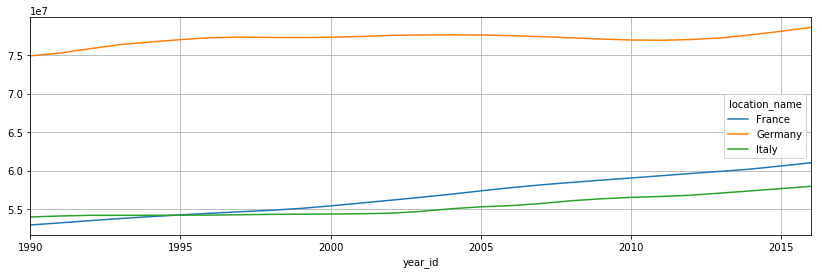

In [12]:
gb.unstack().plot(figsize=(14,4))
plt.grid()

***